### **Pengantar Pembelajaran Mesin - Dr. Bambang Heru Iswanto** <br>

### **Kelompok 4 - Fisika B 2021**
### 1. Khansa Farras Callista (1306621067)<br>
### 2. Salma Mardhiyah (1306621061) <br>

---



#**UTS - Artificial Neural Networks 2 (Project)**

### **PENGUMPULAN DATA**

Dataset pada tugas TP1 tidak dapat digunakan untuk projek ini dikarenakan dataset tersebut membahas terkait real estate/perumahan yang digunakan untuk mencari regresi yaitu prediksi harga dari rumah/real estate.

Dataset projek ini didapatkan dari jurnal oleh Rachakonda pada tahun 2021 mengenai SaYoPillow. SaYoPillow ini merupakan SaYoPillow diusulkan untuk membantu dalam memahami hubungan antara stres dan tidur dan untuk sepenuhnya mewujudkan gagasan "Smart-Sleeping" dengan mengusulkan perangkat tepi. Berdasarkan ini, perilaku selama tidur dapat memprediksi kelas stres.

Sumber :
- https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep/data
- L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.

**TUJUAN PROJEK** <br>
Dalam proyek ini, kami bertujuan untuk memanfaatkan kumpulan data yang berisi berbagai pengukuran fisiologis selama tidur untuk memprediksi tingkat stres yang dialami individu.

In [2010]:
# Mengimport library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2011]:
data = pd.read_csv('Human_Stress_Detection.csv')
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**DESKRIPSI ATRIBUT/FITUR DATASET**


In [2012]:
# Mengganti nama kolom DataFrame agar lebih mudah dibaca dan dipahami
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Pada data ini terdapat hubungan antara berbagai kolom deskripsi terhadap tingkat stress seseorang. Tingkat stress ini dibagi menjadi 5 (0 - low/normal, 1 – medium low, 2 - medium, 3 - medium high, 4 - high).

1. 'sr' atau 'snoring_rate': Kecepatan atau intensitas mendengkur saat tidur, yang dapat diukur dalam satuan atau skala tertentu.
2. 'rr' atau 'respiration_rate': Jumlah napas yang diambil per menit saat tidur.
3. 't' atau 'body_temperature': Suhu tubuh pengguna saat tidur, kemungkinan diukur dalam derajat Celcius atau Fahrenheit.
4. 'lm' atau 'limb_movement': Kecepatan atau intensitas gerakan anggota tubuh saat tidur, yang menunjukkan seberapa aktif atau gelisah orang tersebut.
5. 'bo' atau 'blood_oxygen': Tingkat oksigen darah, yang mewakili jumlah oksigen yang ada dalam darah selama tidur.
6. 'rem' atau 'eye_movement': Aktivitas pergerakan mata saat tidur, yang mungkin mengindikasikan fase tidur Rapid Eye Movement (REM).
7. 'sr.1' atau 'sleeping_hours': Jumlah jam tidur selama sesi tidur tertentu.
8. 'hr' atau 'heart_rate': Jumlah detak jantung per menit saat tidur, merupakan parameter fisiologis penting yang terkait dengan kesehatan dan kualitas tidur secara keseluruhan.
9. 'sl' atau 'stress_level': Variabel target yang mewakili tingkat stres selama tidur

In [2013]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      629 non-null    float64
 1   respiration_rate  629 non-null    float64
 2   body_temperature  629 non-null    float64
 3   limb_movement     629 non-null    float64
 4   blood_oxygen      629 non-null    float64
 5   eye_movement      629 non-null    float64
 6   sleeping_hours    629 non-null    float64
 7   heart_rate        629 non-null    float64
 8   stress_level      629 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [2014]:
# Memeriksa nilai null dalam dataframe
data.isnull().any()

snoring_rate        False
respiration_rate    False
body_temperature    False
limb_movement       False
blood_oxygen        False
eye_movement        False
sleeping_hours      False
heart_rate          False
stress_level        False
dtype: bool

Output dari baris data.isnull().any() menunjukkan bahwa tidak ada nilai yang hilang di kolom mana pun dari kumpulan data sehingga tidak ada baris yang perlu dieliminasi

**SPLITTING THE DATA INTO TRAIN AND TEST DATASETS (80 : 20)**

In [2015]:
# Mendefinisikan atribut independen dan dependen dalam set pelatihan dan pengujian
X = data.drop(["stress_level"], axis=1)
y = data["stress_level"]

- x_data : kolom (fitur untuk memprediksi tipe_kelas) untuk pelatihan.
- y_data : kolom untuk membandingkan dengan hasil prediksi.

In [2016]:
# Membagi data menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=8)
X_train.shape, X_test.shape

print(X_train)

     snoring_rate  respiration_rate  body_temperature  limb_movement  \
158        96.320            26.320            85.400         17.160   
605        94.040            25.744            91.872         16.680   
84         68.320            20.832            92.832         10.832   
415        45.720            16.288            96.432          4.576   
445        97.984            27.984            87.480         17.992   
..            ...               ...               ...            ...   
136        48.360            17.344            98.016          6.688   
133        92.720            25.392            91.696         16.240   
361        52.000            18.400            94.400          8.400   
340        45.600            16.240            96.360          4.480   
451        87.920            24.112            91.056         14.640   

     blood_oxygen  eye_movement  sleeping_hours  heart_rate  
158        82.480        100.40           0.000       75.80  
605        

In [2017]:
print(y_train)

158    4
605    3
84     2
415    0
445    4
      ..
136    0
133    3
361    1
340    0
451    3
Name: stress_level, Length: 503, dtype: int64


### **PRA-PEMROSESAN DATA**

Menormalisasi data: scaling fitur-fitur ke dalam rentang [0, 1]

In [2018]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Mengonversikan label kategori/kelas ke bentuk one-hot encoding

In [2019]:
from tensorflow.keras.utils import to_categorical

y_train_before = y_train
y_test_before = y_test

n_output = np.unique(y_train).shape[0]
y_train = to_categorical(y_train, n_output)
y_test  = to_categorical(y_test, n_output)

print(y_train)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


### **MEMBANGUN MODEL MLP 2 LAPIS**

− Metrik untuk mengukur performa model:
accuracy metric  umum digunakan untuk mengukur kinerja model klasifikasi khususnya pada multikelas

− Fungsi rugi (cost function):
Categorical crossentropy merupakan fungsi rugi yang sesuai untuk tugas klasifikasi multikelas. Fungsi ini mengukur sejauh mana distribusi probabilitas yang dihasilkan oleh model cocok dengan distribusi probabilitas yang sesungguhnya dari kelas-kelas yang benar.

− Optimizer :
Adam adalah algoritma optimisasi yang umumnya digunakan dalam pelatihan model jaringan saraf tiruan. Adam bersifat adaptif yang berarti secara otomatis menyesuaikan laju pembelajaran (learning rate) selama pelatihan untuk mempercepat konvergensi model.

In [2020]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer

In [2021]:
model=Sequential()

# hidden layer 1
model.add(Dense(15, activation="relu"))
# hidden layer 2
model.add(Dense(15, activation="relu"))
# output layer
model.add(Dense(n_output, "softmax"))

In [2022]:
epochs=30
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Pada proses klasifikasi MLP ini, kami menggunakan 2 hidden layers dengan 15 nodes dan 'ReLU' sebagai aktivasi dari setiap layer

###**MELATIH MODEL**

In [2023]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Model1 = model.fit(X_train, y_train, epochs=epochs, batch_size=64,validation_split=0.2,callbacks=[callback],verbose=1)

Epoch 1/30
7/7 [==============================] - 1s 45ms/step - loss: 1.6689 - accuracy: 0.2388 - val_loss: 1.5656 - val_accuracy: 0.2970
Epoch 2/30
7/7 [==============================] - 0s 10ms/step - loss: 1.5587 - accuracy: 0.2388 - val_loss: 1.4822 - val_accuracy: 0.3069
Epoch 3/30
7/7 [==============================] - 0s 8ms/step - loss: 1.4679 - accuracy: 0.2413 - val_loss: 1.4139 - val_accuracy: 0.3069
Epoch 4/30
7/7 [==============================] - 0s 9ms/step - loss: 1.3935 - accuracy: 0.3731 - val_loss: 1.3609 - val_accuracy: 0.3960
Epoch 5/30
7/7 [==============================] - 0s 11ms/step - loss: 1.3327 - accuracy: 0.4254 - val_loss: 1.3150 - val_accuracy: 0.4158
Epoch 6/30
7/7 [==============================] - 0s 11ms/step - loss: 1.2821 - accuracy: 0.5100 - val_loss: 1.2693 - val_accuracy: 0.5743
Epoch 7/30
7/7 [==============================] - 0s 9ms/step - loss: 1.2350 - accuracy: 0.6766 - val_loss: 1.2253 - val_accuracy: 0.6733
Epoch 8/30
7/7 [==============

Berdasarkan monitoring akurasi dan kerugian pada data validasi selama pelatihan, dapat diketahui bahwa semakin tinggi epoch atau iterasi yang dilakukan maka akurasi akan semakin meningkat dan besarnya kerugian semakin mengecil

###**EVALUASI MODEL**

Mengevaluasi model dengan data_test

In [2024]:
accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.9762


Menghitung confusion matrix dan menganalisa metrik kinerja modelnya

In [2025]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

4/4 [==============================] - 0s 4ms/step


Text(0.5, 23.52222222222222, 'Predicted label')

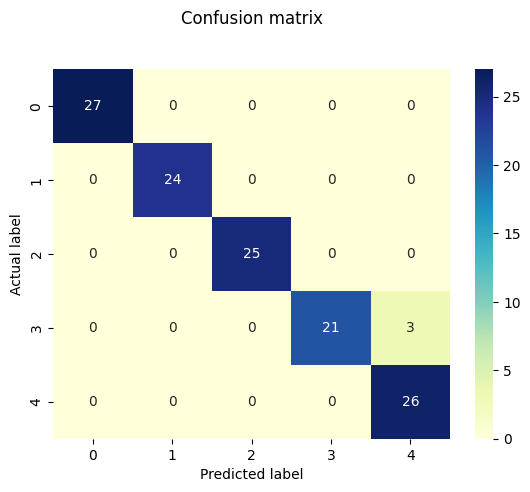

In [2026]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_before, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion matriks ini menjelaskan terkait pertimbangan masalah klasifikasi dua kelas. Nilai diagonal utama adalah nilai prediksi yang benar, sedangkan nilai di luar diagonal tersebut adalah nilai prediksi yang salah.

In [2027]:
print(classification_report(y_test_before, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        25
           3       1.00      0.88      0.93        24
           4       0.90      1.00      0.95        26

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.98       126
weighted avg       0.98      0.98      0.98       126



Akurasi, presisi, recall, and F1-score adalah metrik penting untuk mengevaluasi performa model, terutama dalam masalah klasifikasi multi-class. Metrik ini memberikan wawasan tentang seberapa baik kinerja model untuk setiap kelas dan keakuratan klasifikasinya secara keseluruhan dimana pada projek ini terlihat bahwa tingkat akurasi, presisi, dan F1-score yang tinggi menandakan performa model telah bekerja dengan baik.

###**PREDIKSI**

In [2028]:
# Data baru yang diberikan
new_data1 = pd.DataFrame({
    'snoring_rate': [45.280],
    'respiration_rate': [16.112],
    'body_temperature': [96.186],
    'limb_movement': [4.224],
    'blood_oxygen': [95.112],
    'eye_movement': [61.12],
    'sleeping_hours': [7.112],
    'heart_rate': [50.28]})

new_data2 = pd.DataFrame({
    'snoring_rate': [96.288],
    'respiration_rate': [26.288],
    'body_temperature': [85.360],
    'limb_movement': [17.144],
    'blood_oxygen': [82.432],
    'eye_movement': [100.36],
    'sleeping_hours': [0.00],
    'heart_rate': [75.72]})

# Lakukan penskalaan pada data baru
new_data_scaled1 = scaler.transform(new_data1)
new_data_scaled2 = scaler.transform(new_data2)

# Gunakan model untuk melakukan prediksi
predictions1 = model.predict(new_data_scaled1)
predictions2 = model.predict(new_data_scaled2)

# Hasil prediksi berupa probabilitas kelas stres, Anda dapat mengambil kelas dengan probabilitas tertinggi
predicted_class1 = np.argmax(predictions1)
predicted_class2 = np.argmax(predictions2)

# `predicted_class` adalah prediksi kelas stres untuk data baru yang diberikan
print(f'Prediksi kelas stres untuk data baru 1: {predicted_class1}')
print(f'Prediksi kelas stres untuk data baru 2: {predicted_class2}')

1/1 [==============================] - 0s 24ms/step
Prediksi kelas stres untuk data baru 1: 0
Prediksi kelas stres untuk data baru 2: 4


Dari data baru yang diinput, diketahui prediksi dari data pertama menunjukkan tingkat stress terendah(0) dan data kedua menunjukkan tingkat stress tertinggi(4). Hasil ini diperoleh dari proses pemodelan dengan tingkat akurasi yang tinggi sehingga dapat disimpulkan bahwa hasil prediksi  memiliki keakurasian yang tinggi pula.

Pengaruh snoring, respiration, limb movement, eye movement, dan heart rate berbanding lurus dengan kelas stress. sedangkan body temperature, blood oxygen, dan sleeping hours berbanding terbalik dengan kelas stress.

###**VISUALISASI HASIL**

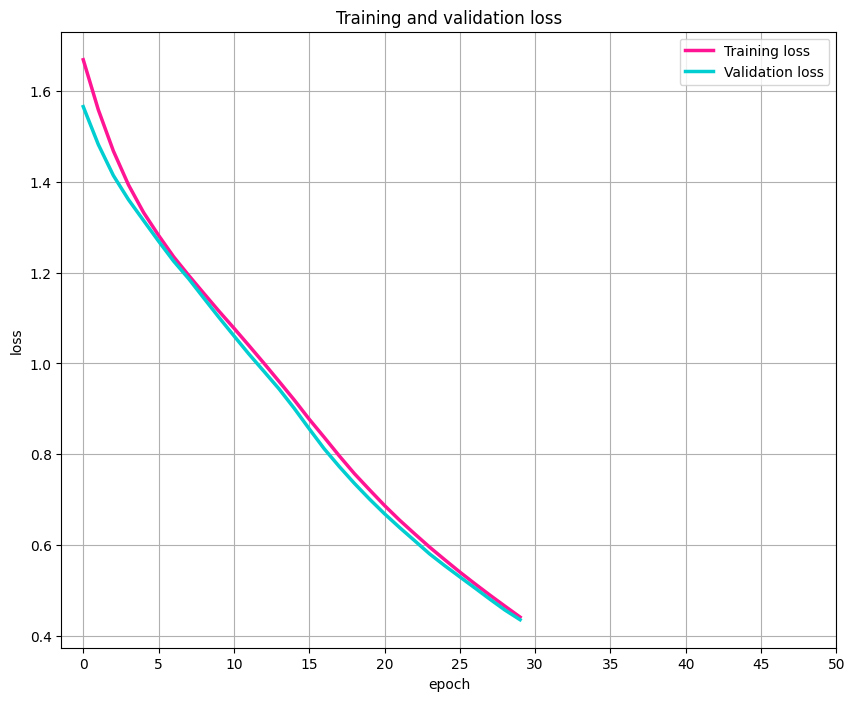

In [2029]:
import matplotlib.pyplot as plot

stats_data = pd.DataFrame(Model1.history)
stats_data['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sns.lineplot(y='loss', x='epoch', data=stats_data, color='deeppink', linewidth=2.5, label="Training loss")
sns.lineplot(y='val_loss', x='epoch', data=stats_data, color='darkturquoise', linewidth=2.5, label="Validation loss")
plot.grid()
plot.legend()
plot.title("Training and validation loss")
plot.xticks(range(0, 51, 5));

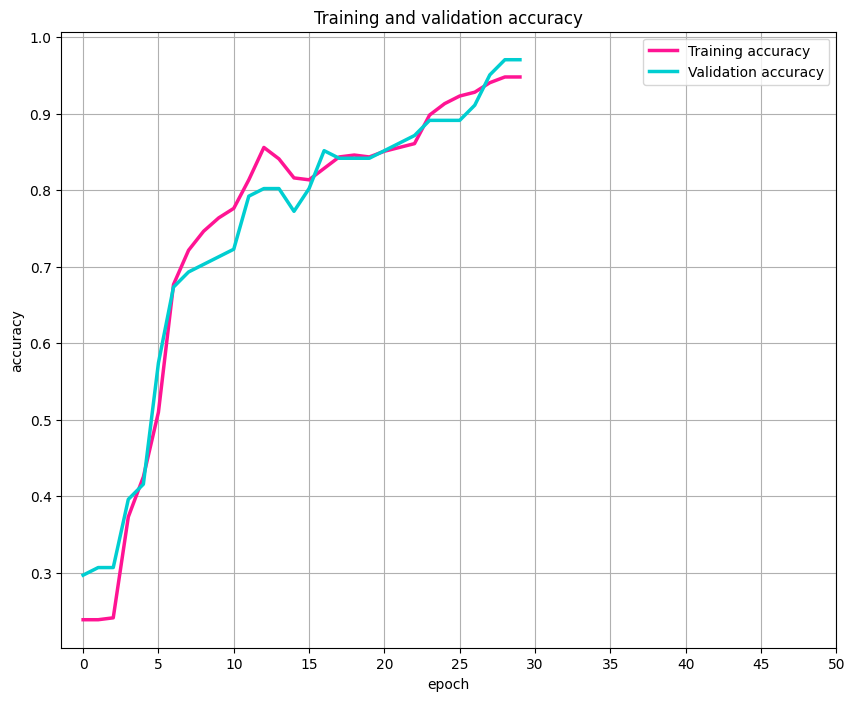

In [2030]:
stats_data=pd.DataFrame(Model1.history)
stats_data['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sns.lineplot(y='accuracy', x='epoch', data=stats_data, color='deeppink', linewidth=2.5, label="Training accuracy")
sns.lineplot(y='val_accuracy', x='epoch', data=stats_data, color='darkturquoise', linewidth=2.5, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")
plot.xticks(range(0, 51, 5));

##**LAPORAN TUGAS**

**DESKRIPSI DATASET** <br>
Dataset ini mengandung data fisiologis yang dikumpulkan dari individu dengan tujuan untuk mendeteksi tingkat stres yang dialami oleh manusia. Data ini mencakup sejumlah fitur yang berkaitan dengan fisiologi manusia, seperti tingkat pernapasan, suhu tubuh, gerakan anggota tubuh, tingkat oksigen dalam darah, gerakan mata, durasi tidur, denyut jantung, dan tingkat dengkuran. Selain itu, dataset juga mencakup label yang menunjukkan tingkat stres aktual dari setiap data pengamatan. Dataset ini digunakan untuk mengembangkan model machine learning, khususnya model jaringan saraf tiruan (neural network), yang bertujuan untuk melakukan klasifikasi tingkat stres berdasarkan data fisiologis yang tersedia.

**ARSITEKTUR MODEL** <br>
Dalam arsitektur yang dibentuk oleh jaringan perceptron multilayer, dalam project kami digunakan 2 hidden layer dengan masing-masing 15 neuron. Kami juga menggunakan activation ReLu pada hidden layer dan softmax pada output layer. Fungsi pengoptimal yang digunakan adalah "adam" dengan cost function adalah "categorical crossentropy".

<Img src="https://drive.google.com/uc?id=1t0ti69B27fUyTn5JF6mmAHxdre2-KuwD" width=700px>

**HASIL EVALUASI** <br>
Hasil observasi ini menunjukkan bahwa coding tersebut adalah langkah-langkah umum dalam pengembangan model klasifikasi menggunakan jaringan saraf tiruan. Dalam hal ini, model digunakan untuk mengklasifikasikan tingkat stres berdasarkan data fisiologis, dan akurasi serta metrik evaluasi lainnya digunakan untuk mengukur kinerja model. Coding ini memberikan dasar yang baik untuk mengatasi masalah deteksi stres berdasarkan data fisiologis manusia.Model klasifikasi yang telah dibuat sudah bekerja dengan sangat baik. Hal ini ditunjukkan dari tingkat mendapatkan akurasi yang tinggi mencapai 95% sehingga dapat memprediksi tingkat stres dari data baru dengan akurat

Apabila dilihat dari grafik Training dan Validation loss, dapat dilihat bahwa seiring dengan kenaikan iterasi/epoch maka tingkat perbedaan antara loss dari kedua data semakin mengecil. Selain itu, akurasi semakin meningkat dari 0,2388 pada epoch pertama menjadi 0,95 pada epoch ke 30. Hasil evaluasi yang telah dilakukan menghasilkan akurasi yang lebih tinggi dibandingkan dengan sebelumnya.

**KESIMPULAN** <br>
Model klasifikasi yang telah dibuat sudah bekerja dengan sangat baik. Hal ini ditunjukkan dari tingkat mendapatkan akurasi yang tinggi mencapai 95% sehingga dapat memprediksi tingkat stres dari data baru dengan akurat

In [2035]:
%%shell
jupyter nbconvert --to html /content/Kelompok_4_UTS_Projek_Klasifikasi_MLP.ipynb

[NbConvertApp] Converting notebook /content/Kelompok_4_UTS_Projek_Klasifikasi_MLP.ipynb to html
[NbConvertApp] Writing 798775 bytes to /content/Kelompok_4_UTS_Projek_Klasifikasi_MLP.html
